b

In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). 
* Overall, there are 45 points, however, you can get a maximum of 40 points for this assignment( `your_points = max(your_points, 40)`). 
* No bonus points will be transferred to the next assignment.

# Task 1. Moscow weather (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore Moscow weather. You can look at some visualizations of martian weather [here](https://pudding.cool/2018/01/mars-weather/) (completely unrelated to Moscow weather, though).

First of all, you will need some libraries. Also, fix random seed to get reproducable results.

In [11]:
import numpy as np
from numpy.random import choice, seed
import pandas as pd
from scipy.stats import sem, norm, skew, chi2
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as st 


seed(123)
%matplotlib inline

In [2]:
import matplotlib as mp
import matplotlib.font_manager
import matplotlib.pyplot as plt

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)

mp.rc('font', **{'family':'serif'})

## Part 1. Load data (1 point)

You need to load data from `moscow-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### a) 

`feature_name = "TMIN"`

### b)

`feature_name = "TMAX"`

In [3]:
feature_name = "TMAX"
df = pd.read_csv("moscow-weather.csv")[feature_name]
sample_full = df.dropna().values.astype(int)

Let's take a five month period or ~ 150 days. Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [4]:
N = 150

sample_part = np.random.choice(sample_full, size=N, replace=False)

sample_part

array([ 18,   2,  24,  26,  25,   0,  29,  30,  10, -15,  21,  16,   5,
         0,  18,   1, -18,  10,  -1,  24,  14,  23,  21,  -5,  23,  28,
        13,  24,  17,   9,   7,   9,  21,  28,   0,  23,  20,  21,  16,
        21,   2,  24,   0,  13,  -3,  -5,  24,  18,  23,   5,   7,  23,
         2,   3, -15,  17,  26,  22,  24,  30,   2,   3, -11, -14,  10,
        -2,   1,   0,  -8,  16,  -3,  13,  17,  27,  23,   9,  17,   8,
         3,  21,  -9,  20,   4,  14,  25,  21,  26,  16,   9,   6,   1,
        17,  24,  20,   8,  14,  26,  16,   0,  23,  -9,  31,  -4,   3,
       -11,  -3,  20,  10,  -1,  25,  21, -10,   7,   0,  15,  -1,  29,
        27,  -5,  10,   6,  13,  32,   2,  26,   8,   4,   0,  28,   8,
        12,   5,  -2,  13,  -4,   2,   6, -10,  25,  20,   6,  26,   8,
        21,   3,   2,  18,   0,  -1,  23])

Plot values frequences for full and partial sample using bar plot.

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

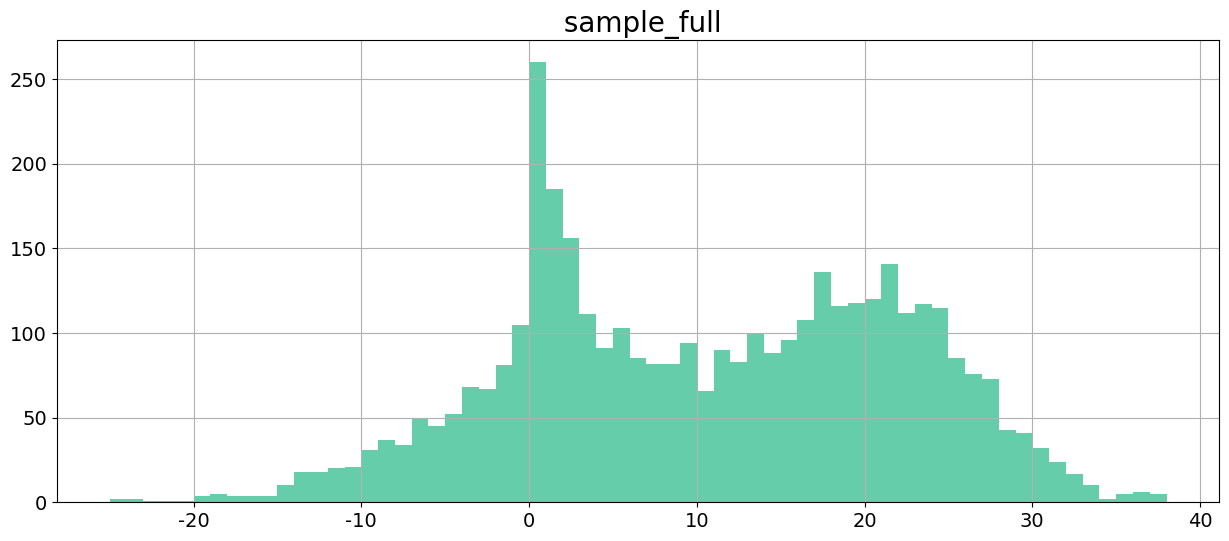

In [5]:
plt.figure(figsize=(15, 6))

n = np.unique(sample_full)
plt.hist(x=sample_full, bins=n, color='mediumaquamarine')
plt.title(' sample_full')
plt.grid()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

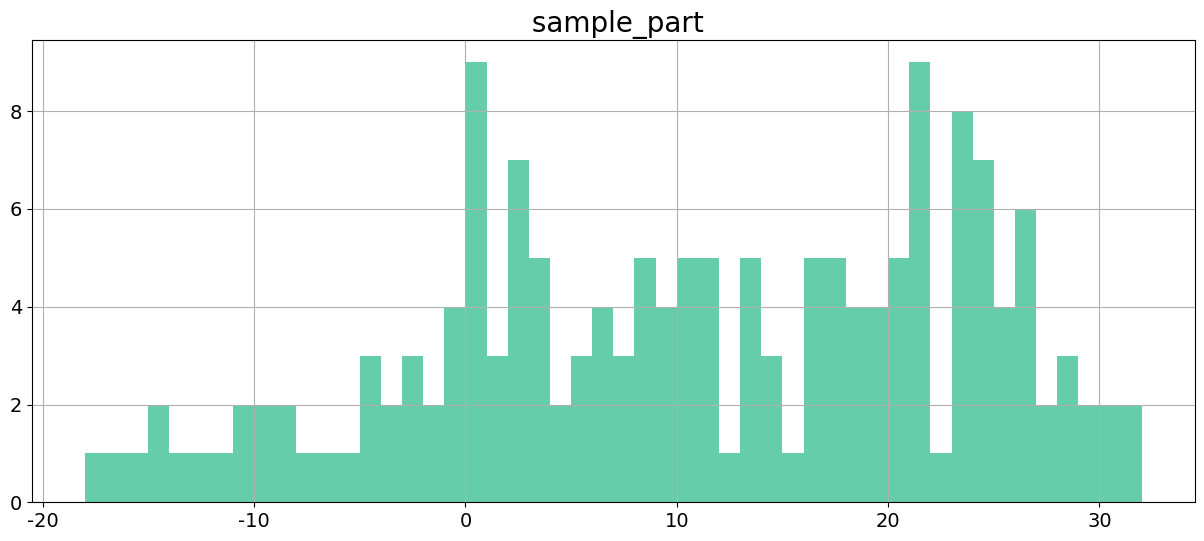

In [6]:
plt.figure(figsize=(15, 6))

n = np.unique(sample_part)
plt.hist(x=sample_part, bins=n, color='mediumaquamarine')
plt.title(' sample_part')
plt.grid()
plt.show()

## Part 2. Parameter estimation (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations (with intermediate steps) for estimates and intervals (with intermediate steps) and then make simulation.

### a) Mean and CI

$$ \hat{mean}_n = \sum \frac{1}{n} \mu = \mu$$

$$\mu = \int x f(x) dx = \int x \frac{1}{n} \sum_{i = 1}^n \delta(x - X_i) = \frac{1}{N} \sum_{i = 1}^{N} X_i $$

$$\hat{V}_{n}(\hat{\mu}_n) = \frac{\hat{\sigma}^{2}_n}{n}$$

$$\hat{\sigma}_n = E[(x - \mu)^2] = \int f(x) (x - \hat{\mu}_n)^2dx = \int \frac{1}{n} \sum \delta(x - X_i)(x - \hat{\mu}_n)^2 dx = \frac{1}{n} \sum(X_i - \hat{\mu}_n)^2$$
It gives us based varianse estimation. In order to gen unbaised estimation we need to renormalize expression
$$\hat{\sigma}_n  = \frac{1}{n - 1} \sum(X_i - \hat{\mu}_n)^2$$

### $$ CI(\hat{mean}) = (\hat{\mu}_n - z_{\frac{\alpha}{2}} \hat{se}, \hat{\mu}_n + z_{\frac{\alpha}{2}} \hat{se})$$

$$\hat{se} = \sqrt{V(\hat{\mu}_n)} = \frac{\hat{\sigma}_n }{\sqrt{n}} = \frac{1}{\sqrt{n(n-1)}} \sum(X_i - \hat{\mu}_n)^2$$

$$z_{\frac{\alpha}{2}} = \Phi^{-1}\left(1-\frac{\alpha}{2} \right)$$

In [23]:
# Your code here


mean, (lower, upper) = np.mean(sample_part), st.norm.interval(0.95, loc=np.mean(sample_part), scale=st.sem(sample_part)) 


f"Mean {mean:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Mean 11.100 with confidence interval (9.187, 13.013)'

### b) Median and CI

Here you can assume that PDF is continuous at the median point and provide a normal-based interval.

We know from lecture that 
$$ \hat{median} = {sample med} \sim   N \left( m, \frac{\pi}{2} \frac{\sigma^2}{n} \right)$$
where m is median 

$$ CI(\hat{median}) = \left(\hat{median}−z_{\frac{\alpha}{2}}\sqrt{\frac{\pi}{2n}}\sigma_n;\; \hat{median}+z_{\frac{\alpha}{2}}\sqrt{\frac{\pi}{2n}} \sigma_n\right)$$

In [22]:
# Your code here

median, (lower, upper) = np.median(sample_part), st.norm.interval(0.95, loc=np.median(sample_part), scale=(np.pi / (2 * len(sample_part)))**(1/2) * (np.var(sample_part, ddof=1))**(1/2))
f"Median {median:.3f} with normal-based confidence interval ({lower:.3f}, {upper:.3f})"

'Median 11.000 with normal-based confidence interval (8.602, 13.398)'

### c) Variance and CI

Here you can assume that the sample comes from a normal distribution, but the mean and variance are not known.

We will use maximum likelihood estimation

$$\mathcal{L} = \prod_{i = 1}^{n}\frac{1}{\sigma} exp\left(-\frac{1}{2\sigma^2} (X_i - \mu)^2\right) = \frac{1}{\sigma^n} exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n(X_i - \mu)^2\right) = \frac{1}{\sigma^n} exp\left(-\frac{nS_n^2}{2\sigma^2}\right) exp\left(-\frac{n(\overline{X}_n - \mu)^2}{2\sigma^2}\right)$$

where $\overline{X}_n = \frac{1}{n} \sum X_i$ and $S_n^2 = \frac{1}{n} \sum (X_i - \overline{X}_n)^2$

$$l_n(\mu, \sigma) = -nlog(\sigma) - \frac{nS_N^2}{2\sigma^2} - \frac{n(\overline{X}_n - \mu)^2}{2\sigma^2}$$

Differeciating over $\mu$ and $\sigma $ we get estimation
$$ \hat{Variance} = S_n^2$$
$$\mu = \overline{X}_n$$

$$\hat{se} = \left(\frac{1}{I_n(\hat{V_n})} \right)^{1/2}$$

\begin{aligned}
\log f(X;\sigma)& =-\log\sigma-\frac{(X-\mu)^{2}}{2\sigma^{2}}  \\
\frac{\partial^{2}\log f(X;\sigma)}{\partial\sigma^{2}}& =\frac{1}{\sigma^{2}}-\frac{3(X-\mu)^{2}}{\sigma^{4}},  \\
I(\sigma)=-\frac{1}{\sigma^{2}}& +\frac{3\sigma^{2}}{\sigma^{4}}=\frac{2}{\sigma^{2}}. 
\end{aligned}

$$\widehat{s}e=\frac{\widehat{\sigma}_{n}}{\sqrt{2n}}$$

$$ CI(\hat{Variance}) = \left(S_n^2−z_{\frac{\alpha}{2}}\sqrt{\frac{1}{2n}}S_n;\; S_n^2+z_{\frac{\alpha}{2}}\sqrt{\frac{1}{2n}} S_n\right)$$

In [24]:
# Your code here

var, (lower, upper) = np.var(sample_part, ddof=0), st.norm.interval(0.95, loc=np.var(sample_part, ddof=0), scale=(1 / (2 * len(sample_part)))**(1/2) * (np.var(sample_part, ddof=0))**(1/2))
f"Variance {var:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Variance 141.957 with confidence interval (140.608, 143.305)'

### d) Mode (most frequent value in a sample)

In [25]:
# Your code here

mode = max(set(sample_part), key=sample_part.tolist().count)
f"Mode: {mode}"

'Mode: 0'

### e) Skewness

In [26]:
# Your code here

skewness = skew(sample_part)
f"Skewness: {skewness:e}"

'Skewness: -2.538610e-01'

## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

### a) Mean and CI

In [37]:
# Your code here
N = 1000
bootstrap_mean = np.array([])
for _ in range(N):
    bootstrap_sample = np.random.choice(sample_part, size=int(np.shape(sample_part)[0]), replace=True)
    mean = np.mean(bootstrap_sample)
    bootstrap_mean = np.append(bootstrap_mean, mean)

mean = np.mean(bootstrap_mean)
std = np.std(bootstrap_mean, ddof=1)

mean, (lower, upper) = mean, st.norm.interval(0.95, loc=mean, scale=std)

f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})"

'Mean 11.123 with confident interval (9.141, 13.106)'

### b) Median and CI

In [42]:
# Your code here


N = 1000
bootstrap_med = np.array([])
for _ in range(N):
    bootstrap_sample = np.random.choice(sample_part, size=int(np.shape(sample_part)[0]), replace=True)
    med = np.median(bootstrap_sample)
    bootstrap_med = np.append(bootstrap_med, med)

med = np.mean(bootstrap_med)
std = np.std(bootstrap_med, ddof=1)


med, (lower, upper) =  med, st.norm.interval(0.95, loc=med, scale=std)
f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})"

'Median 11.000 with normal-based confident interval (7.222, 15.772)'

### c) Variance and CI

In [47]:
# Your code here


N = 1000
bootstrap_var = np.array([])
for _ in range(N):
    bootstrap_sample = np.random.choice(sample_part, size=int(np.shape(sample_part)[0]), replace=True)
    var = np.var(bootstrap_sample)
    bootstrap_var = np.append(bootstrap_var, var)

var = np.mean(bootstrap_var)
std = np.std(bootstrap_var, ddof=1)


var, (lower, upper) = var, st.norm.interval(0.95, loc=var, scale=std)
f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})"

'Variance 141.364 with confident interval (117.439, 165.288)'

## Part 4. Comparison with true values (1 point)

Compare with estimates calculated over full sample. Write conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about moscow weather :)

In [48]:
# Your code here

mean_full = np.mean(sample_full)
median_full = np.median(sample_full)
var_full = np.var(sample_full, ddof=1)
mode_full = max(set(sample_full), key=sample_full.tolist().count)
skewness_full = skew(sample_full)
mean = np.mean(sample_part)
median = np.median(sample_part)
var = np.var(sample_part, ddof=1)
mode = max(set(sample_part), key=sample_part.tolist().count)
skewness = skew(sample_part)

print(f"Mean full sample           {mean_full:.3f}\n "
      f"Mean bootstrap sample      {mean:.3f}\n\n"
      f"Median full sample         {median_full:.3f}\n"
      f"Median bootstrap sample    {median:.3f}\n\n"
      f"Variance full sample       {var_full:.3f}\n"
      f"Variance bootstrap sample  {var:.3f}\n\n"
      f"Mode full sample           {mode_full:.3f}\n"
      f"Mode bootstrap sample      {mode:.3f}\n\n"
      f"Skewness full sample       {skewness_full:.3f}\n"
      f"Skewness bootstrap sample  {skewness:.3f}\n")

Mean full sample           10.136
Mean bootstrap sample      11.100

Median full sample         10.000
Median bootstrap sample    11.000

Variance full sample       129.638
Variance bootstrap sample  142.909

Mode full sample           0.000
Mode bootstrap sample      0.000

Skewness full sample       -0.081
Skewness bootstrap sample  -0.254



## Part 5. Confidence intervals and sample size (8 points)

Compare the size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[32, 64, 128, 256, 512, 1024]`. Plot results and make conclusion about their accuracy.

In [50]:
seed(1337)
sizes = np.r_[32, 64, 128, 256, 512, 1024]

In [60]:
# Compare size of confidence intervals obtained without and with bootstrap
# Your code here

N = 1000

mean_intervals = np.array([])
bootstrap_mean_intervals = np.array([])

for size in sizes:

    sample = np.random.choice(sample_full, size=size, replace=False) 
    
    mean = np.mean(sample)
    std_error = sem(sample)
    z = 1.96
    lower = mean - z * std_error
    upper = mean + z * std_error
    mean_intervals = np.append(mean_intervals, upper - lower)

    bootstrap_means = np.array([])
    for _ in range(N):
        bootstrap_sample = np.random.choice(sample, size=size, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


    bootstrap_mean = np.mean(bootstrap_means)
    bootstrap_std = np.std(bootstrap_means, ddof=1)
    bootstrap_error = bootstrap_std 
    lower = bootstrap_mean - z * bootstrap_error
    upper = bootstrap_mean + z * bootstrap_error
    bootstrap_mean_intervals = np.append(bootstrap_mean_intervals, upper - lower)

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

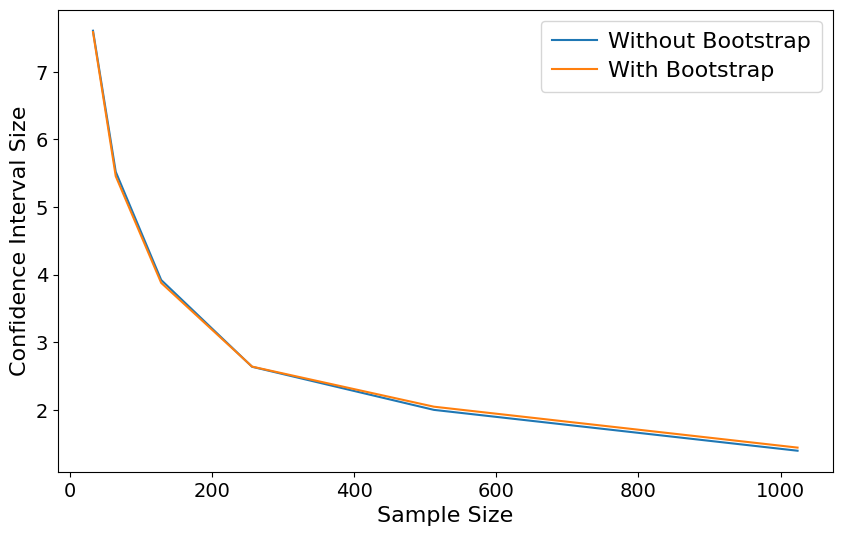

In [62]:
# Plot results
# Your code here

plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_intervals, label='Without Bootstrap')
plt.plot(sizes, bootstrap_mean_intervals, label='With Bootstrap')
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval Size')
plt.legend()
plt.show()

In [89]:
# Compare the empirical coverage of different confidence intervals
# Your code here

mean_full_sample = np.mean(sample_full)

z = 1.96
N = 10000
n_bootstrap = 1000
coverage = np.array([])
coverage_ar = np.array([])
bootstrap_coverage_ar = np.array([]) 

for size in sizes:

    for _ in range(N):

        sample = np.random.choice(sample_full, size=size, replace=False)
        lower, upper = st.norm.interval(0.95, loc=np.mean(sample), scale=st.sem(sample))

        coverage = np.append(coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))


        bootstrap_means = np.array([])
        for _ in range(n_bootstrap):
            bootstrap_sample = np.random.choice(sample, size=size, replace=True)
            bootstrap_mean = np.mean(bootstrap_sample)
            bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


        bootstrap_mean = np.mean(bootstrap_means)
        bootstrap_std = np.std(bootstrap_means, ddof=1)
        lower = bootstrap_mean - z * bootstrap_std
        upper = bootstrap_mean + z * bootstrap_std 

        bootstrap_coverage = np.append(coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))


    bootstrap_coverage_ar = np.append(bootstrap_coverage_ar, np.mean(bootstrap_coverage))

    coverage_ar = np.append(coverage_ar, np.mean(coverage))








findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

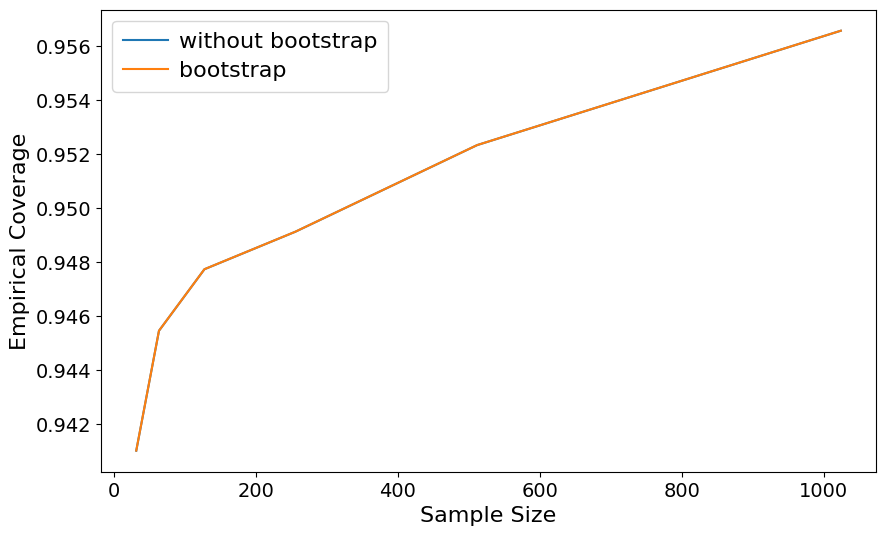

In [90]:
# Plot results
# Your code here

plt.figure(figsize=(10, 6))
plt.plot(sizes, coverage_ar, label='without bootstrap')
plt.plot(sizes, bootstrap_coverage_ar, label='bootstrap')


plt.xlabel('Sample Size')
plt.ylabel('Empirical Coverage')
plt.legend()
plt.show()


Your conclusion: from comparison bootstrap and bootstrap-free methods, we see that their convergence is the same

# Task 2. Currency in RC-circuit (25 points)

In this part you need to estimate parameters and apply delta method. 

First of all, you will need some libraries. Also, fix random seed to get reproducible results.

In [93]:
import numpy as np
from scipy.stats import norm, uniform
from numpy.random import choice, seed

seed(42)

## Part 1. Estimate parameters (4 points)

Assume that there is an RC-circuit with a capacitor and a resistor. 
<img src="circuit.png" width="200"  class="center">

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:

### a) 
$V \sim \mathcal{N}(5, 1.3)$, 

$R \sim \mathcal{U}(7, 12)$

### b) 
$V \sim \mathcal{N}(16, 2)$, 

$R \sim \text{Exp}(20)$

Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.





$$\mathcal{L} = \prod_{i = 1}^{n}\frac{1}{\sigma} exp\left(-\frac{1}{2\sigma^2} (X_i - \mu)^2\right) = \frac{1}{\sigma^n} exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n(X_i - \mu)^2\right) = \frac{1}{\sigma^n} exp\left(-\frac{nS_n^2}{2\sigma^2}\right) exp\left(-\frac{n(\overline{X}_n - \mu)^2}{2\sigma^2}\right)$$

where $\overline{X}_n = \frac{1}{n} \sum X_i$ and $S_n^2 = \frac{1}{n} \sum (X_i - \overline{X}_n)^2$

$$l_n(\mu, \sigma) = -nlog(\sigma) - \frac{nS_N^2}{2\sigma^2} - \frac{n(\overline{X}_n - \mu)^2}{2\sigma^2}$$

Differeciating over $\mu$ and $\sigma $ we get estimation
$$ \hat{Variance} = S_n^2$$
$$\hat{\mu}_n = \overline{X}_n$$

So
$$\hat{V}_{n} = \overline{X}_n$$

In [205]:
# Your code here
size = 100
V_samples = np.random.normal(loc=16, scale=2, size=size) 

V_estimation = np.mean(V_samples)

V_estimation

16.03951719831545

Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.


$$\mathcal{L} = \prod_{i = 1}^{n}\frac{1}{\lambda} exp\left(-\frac{x_i}{\lambda} \right) = \left(\frac{1}{\lambda}\right)^n exp\left(-\frac{\sum x_i}{\lambda} \right)$$
 where $\lambda$ is mean

 $$l_n = -n log(\lambda) - \frac{1}{\lambda} \sum x_i$$

 $$\frac{\partial l_n}{\partial \lambda} = - \frac{n}{\lambda} + \frac{1}{\lambda^2} \sum x_i = 0$$

 Hence, $\lambda = \frac{1}{n} \sum x_i$
$$\hat{R}_{n} = \frac{1}{100} \sum R_i$$


In [209]:
# Your code here

size = 100
R_samples = np.random.exponential(scale=20, size=size) 

R_estimation = np.mean(R_samples)

R_estimation


20.06782833763181

## Part 2. Apply delta method (8 points)

Assume, that we measure current intensity after 1 second. Let's take $C = 1$. In this case we get the following simplified formula:

$$I = \frac{V}{R} e^{-\frac{1}{R}}.$$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

Following delta method
$$\hat{I}_n = \frac{\hat{V}_n}{\hat{R}_n} e^{-\frac{1}{\hat{R}_n}}$$


\begin{aligned}\frac{\widehat I_n-I_*}{\widehat se(\widehat I_n)}&\leadsto\mathcal N(0,1),\\\\\widehat se(\widehat I_n)&=\sqrt{(\widehat\nabla g)^T\widehat J_n(\widehat\nabla g)},\widehat J_n=J_n(\widehat\theta),\widehat\nabla g=\nabla g(\widehat\theta).\end{aligned}

$J_n$ is covariance matrix

$$cov(R, V) = 0$$

$$cov(R, R) = E\left[ (R - \mu_R)^2 \right] = \frac{1}{n} \sum (R_i - \mu_R)^2$$

$$cov(V, V) = \frac{1}{n} \sum (V_i - \mu_V)^2$$

And also we need to find gradient of function $g$

$$\frac{\partial g}{\partial R} = \frac{1 - R}{R^3}V e^{-\frac{1}{R}}$$
$$\frac{\partial g}{\partial V} = \frac{1}{R}e^{-\frac{1}{R}}$$

So, we know everything to write confidence interval


$$ CI(\hat{I}_n) = \left(\hat{I_n} − z_{\frac{\alpha}{2}} \hat{se};\; \hat{I_n} + z_{\frac{\alpha}{2}} \hat{se}\right)$$

In [260]:
I_n = V_estimation / R_estimation * np.exp(-1 / R_estimation)

g_grad = np.array([(1 - R_estimation)/ R_estimation**3 * V_estimation * np.exp(-1 / R_estimation), 1 /R_estimation * np.exp(- 1 / R_estimation)])

J_n = np.array([[1/20, 0],
                [0, 2]])

se = (g_grad.T @ J_n @ g_grad)**(1/2)

lower = I_n - z * se
upper = I_n + z * se

delta_conf = upper - lower

f"I {I_n:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})"



'I 0.760 with normal-based confident interval (0.628, 0.893)'

## Part 3. Non-parametric bootstrap estimation (2 points)

Estimate confidence interval for $I$ using non-parametric bootstrap.

In [256]:
# Your code here
N = 1000
size = 100

I = V_samples / R_samples * np.exp(-1 / R_samples)

bootstrap_means = np.array([])

for _ in range(N):
    bootstrap_sample = np.random.choice(I, size=size, replace=True)

    #print(bootstrap_sample_V / bootstrap_sample_R * np.exp(-1 / bootstrap_sample_R))

    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std = np.std(bootstrap_means, ddof=1)
lower = bootstrap_mean - z * bootstrap_std
upper = bootstrap_mean + z * bootstrap_std


f"I {I_n:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})"


'I 0.760 with normal-based confident interval (1.427, 2.042)'

## Part 4. Parametric bootstrap estimation (3 points)

Estimate confidence interval for $I$ using parametric bootstrap.

(array([32., 24., 15.,  8.,  3.,  6.,  4.,  3.,  3.,  2.]),
 array([5.36473221e-03, 6.75494257e-01, 1.34562378e+00, 2.01575331e+00,
        2.68588283e+00, 3.35601235e+00, 4.02614188e+00, 4.69627140e+00,
        5.36640093e+00, 6.03653045e+00, 6.70665998e+00]),
 <BarContainer object of 10 artists>)

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

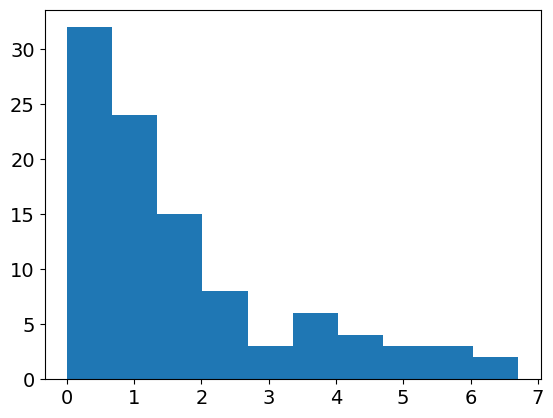

In [257]:
I = V_samples / R_samples * np.exp(-1 / R_samples)

plt.hist(I)



We consider exponential distribution of $I_n$

In [263]:
# Your code here


N = 1000
size = 100

bootstrap_means = np.array([])

for _ in range(N):

    bootstrap_sample = np.random.exponential(scale = 1/I_n, size=size)

    #print(bootstrap_sample_V / bootstrap_sample_R * np.exp(-1 / bootstrap_sample_R))

    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


bootstrap_std = np.std(bootstrap_means, ddof=1)
lower = I_n - z * bootstrap_std
upper = I_n + z * bootstrap_std


f"I {I_n:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})"


'I 0.760 with normal-based confident interval (0.492, 1.029)'

## Part 5. Compare results (8 points)

Compare the size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusion about their accuracy.

In [ ]:
sizes = np.logspace(1, 4, 4).astype(np.int)

In [264]:
# Compare size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap
# Your code here


N = 1000
z = 1.96

I = V_samples / R_samples * np.exp(-1 / R_samples)

bootstrap_intervals = np.array([])
par_bootstrap_intervals = np.array([])

for size in sizes:

    bootstrap_means = np.array([])
    par_bootstrap_means = np.array([])

    for _ in range(N):

        bootstrap_sample = np.random.choice(I, size=size, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


        par_bootstrap_sample = np.random.exponential(scale = 1/I_n, size=size)
        par_bootstrap_mean = np.mean(par_bootstrap_sample)
        par_bootstrap_means = np.append(par_bootstrap_means, par_bootstrap_mean)




    bootstrap_mean = np.mean(bootstrap_means)
    bootstrap_std = np.std(bootstrap_means, ddof=1)
    lower = bootstrap_mean - z * bootstrap_std
    upper = bootstrap_mean + z * bootstrap_std
    bootstrap_intervals = np.append(bootstrap_intervals, upper - lower)



    par_bootstrap_mean = np.mean(par_bootstrap_means)
    par_bootstrap_std = np.std(par_bootstrap_means, ddof=1)
    lower = par_bootstrap_mean - z * par_bootstrap_std
    upper = par_bootstrap_mean + z * par_bootstrap_std
    par_bootstrap_intervals = np.append(par_bootstrap_intervals, upper - lower)



findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

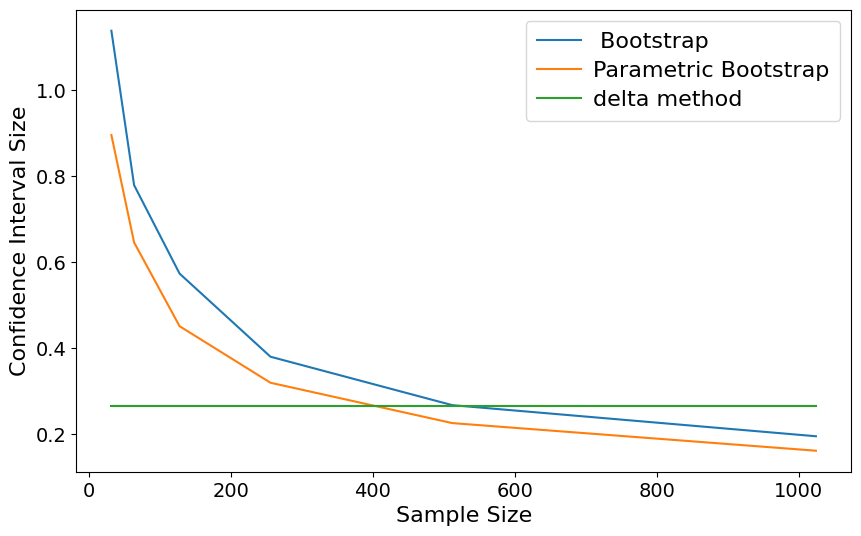

In [266]:
# Plot results
# Your code here

plt.figure(figsize=(10, 6))
plt.plot(sizes, bootstrap_intervals, label=' Bootstrap')
plt.plot(sizes, par_bootstrap_intervals, label='Parametric Bootstrap')

plt.plot(sizes, np.array([delta_conf] * np.shape(sizes)[0]), label='delta method')


plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval Size')
plt.legend()
plt.show()

In [ ]:
# Compare the empirical coverage of different confidence intervals
# Your code here

mean_full_sample = np.mean(sample_full)

z = 1.96
N = 100
n_bootstrap = 1000
coverage = np.array([])
coverage_ar = np.array([])
bootstrap_coverage_ar = np.array([]) 

for size in sizes:

    for _ in range(N):


        for _ in range(n_bootstrap):
            
            bootstrap_sample = np.random.choice(I, size=size, replace=True)
            bootstrap_mean = np.mean(bootstrap_sample)
            bootstrap_means = np.append(bootstrap_means, bootstrap_mean)


            par_bootstrap_sample = np.random.exponential(scale = 1/I_n, size=size)
            par_bootstrap_mean = np.mean(par_bootstrap_sample)
            par_bootstrap_means = np.append(par_bootstrap_means, par_bootstrap_mean)


        bootstrap_mean = np.mean(bootstrap_means)
        bootstrap_std = np.std(bootstrap_means, ddof=1)
        lower = bootstrap_mean - z * bootstrap_std
        upper = bootstrap_mean + z * bootstrap_std

        coverage = np.append(coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))


        par_bootstrap_mean = np.mean(par_bootstrap_means)
        par_bootstrap_std = np.std(par_bootstrap_means, ddof=1)
        lower = par_bootstrap_mean - z * par_bootstrap_std
        upper = par_bootstrap_mean + z * par_bootstrap_std

        par_coverage = np.append(coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))


        bootstrap_coverage = np.append(coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))
        par_bootstrap_coverage = np.append(par_coverage, np.logical_and(mean_full_sample >= lower, mean_full_sample <= upper))


    bootstrap_coverage_ar = np.append(bootstrap_coverage_ar, np.mean(bootstrap_coverage))

    par_bootstrap_coverage_ar = np.append(par_bootstrap_coverage_ar, np.mean(par_bootstrap_coverage))








In [ ]:
# Plot results
# Your code here



Your conclusion:



We see that parametric bootstrap gives less confidence interval then non parametric


